In [1]:
# Instalação das bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Criação do DF
covid_complete = pd.read_csv(r"C:\Users\GPUXI\OneDrive - Bayer\Documents\Backup\Estudos\Data Engineer\covid19-pipeline\data\raw\covid_19_clean_complete.csv")
covid_complete.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [4]:
covid_complete

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


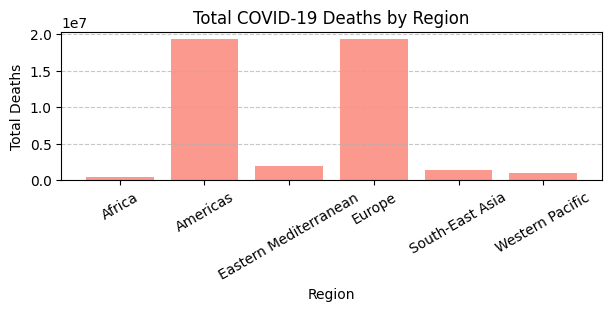

In [ ]:
deaths_by_region = covid_complete.groupby("WHO Region")["Deaths"].sum()

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.bar(deaths_by_region.index, deaths_by_region.values, color='salmon', alpha=0.8)

ax.set_xlabel('Region')
ax.set_ylabel('Total Deaths')
ax.set_title('Total COVID-19 Deaths by Region')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.show()

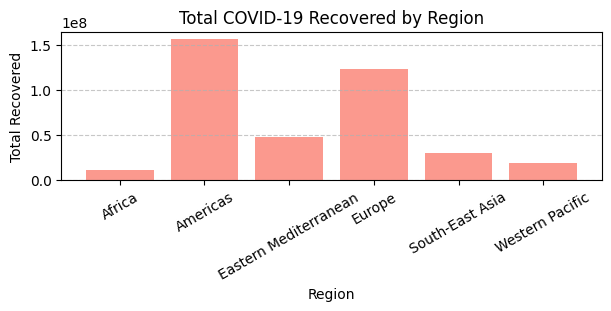

In [10]:
recover_by_region = covid_complete.groupby("WHO Region")["Recovered"].sum()

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.bar(recover_by_region.index, recover_by_region.values, color='salmon', alpha=0.8)

ax.set_xlabel('Region')
ax.set_ylabel('Total Recovered')
ax.set_title('Total COVID-19 Recovered by Region')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.show()

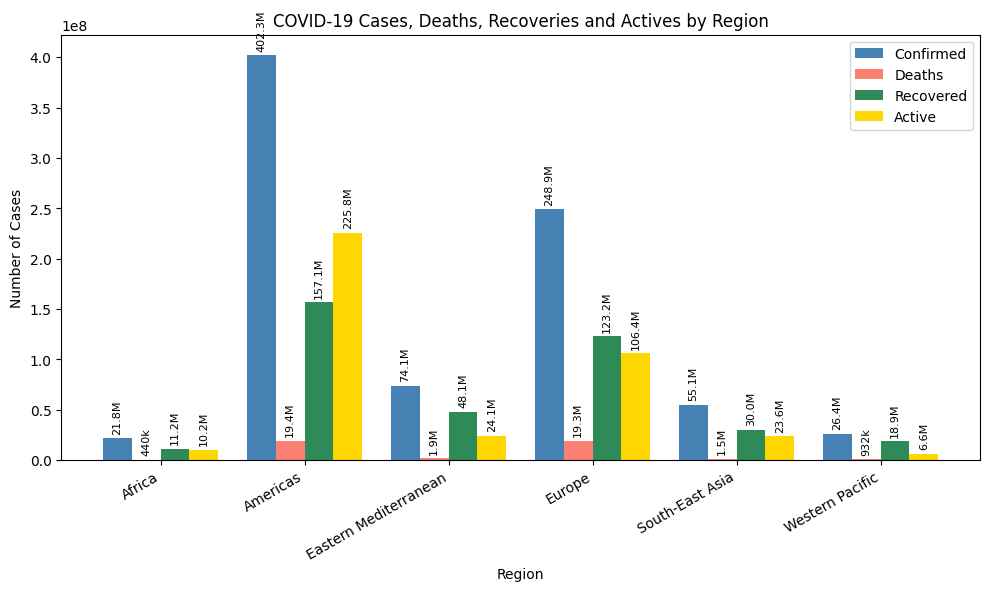

In [12]:
region_summary = covid_complete.groupby("WHO Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

regions = region_summary["WHO Region"]
confirmed = region_summary["Confirmed"]
deaths = region_summary["Deaths"]
recovered = region_summary["Recovered"]
actives = region_summary["Active"]

x = np.arange(len(regions))
width = 0.20

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - 1.5*width, confirmed, width, label="Confirmed", color='steelblue')
bars2 = ax.bar(x - 0.5*width, deaths, width, label="Deaths", color='salmon')
bars3 = ax.bar(x + 0.5*width, recovered, width, label="Recovered", color='seagreen')
bars4 = ax.bar(x + 1.5*width, actives, width, label="Active", color='gold')

ax.set_xlabel("Region")
ax.set_ylabel("Number of Cases")
ax.set_title("COVID-19 Cases, Deaths, Recoveries and Actives by Region")
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=30, ha='right')
ax.legend()

# Função para formatar números automaticamente
def format_number(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value/1_000:.0f}k"
    else:
        return str(int(value))

# Adiciona rótulos formatados acima das barras
ax.bar_label(bars1, labels=[format_number(v) for v in confirmed], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars2, labels=[format_number(v) for v in deaths], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars3, labels=[format_number(v) for v in recovered], padding=3, fontsize=8, rotation=90)
ax.bar_label(bars4, labels=[format_number(v) for v in actives], padding=3, fontsize=8, rotation=90)

plt.tight_layout()
plt.show()